In [1]:
#import needed libraries to start


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from yahoo_fin import stock_info as si
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

%matplotlib inline

from IPython.display import display

#remove warnings
import warnings
warnings.filterwarnings('ignore')

import pandas_datareader.data as web


In [2]:
#get the stock data for stock symbol entry using pandas_datareader

stock_symbol = input("Enter a stock symbol (for example, AAPL): ")
data = web.get_data_yahoo(stock_symbol, '1/1/2016', '2/6/2020',)
data.reset_index(inplace=True,drop=False)

Enter a stock symbol (for example, AAPL): AAPL


In [3]:
data.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.446655
1,2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.979675
2,2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,94.101387
3,2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,90.129868
4,2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.606438
5,2016-01-11,99.059998,97.339996,98.970001,98.529999,49739400.0,92.073563
6,2016-01-12,100.690002,98.839996,100.550003,99.959999,49154200.0,93.409874
7,2016-01-13,101.190002,97.300003,100.320000,97.389999,62439600.0,91.008270
8,2016-01-14,100.480003,95.739998,97.959999,99.519997,63170100.0,92.998695
9,2016-01-15,97.709999,95.360001,96.199997,97.129997,79833900.0,90.765305


In [4]:
data.tail(10)

,Date,High,Low,Open,Close,Volume,Adj Close
1021,2020-01-24,323.329987,317.519989,320.250000,318.309998,36634400.0,318.309998
1022,2020-01-27,311.769989,304.880005,310.059998,308.950012,40485000.0,308.950012
1023,2020-01-28,318.399994,312.190002,312.600006,317.690002,40558500.0,317.690002
1024,2020-01-29,327.850006,321.380005,324.450012,324.339996,54057300.0,324.339996
1025,2020-01-30,324.089996,318.750000,320.540009,323.869995,31685800.0,323.869995
1026,2020-01-31,322.679993,308.290009,320.929993,309.510010,49897100.0,309.510010
1027,2020-02-03,313.489990,302.220001,304.299988,308.660004,43496400.0,308.660004
1028,2020-02-04,319.640015,313.630005,315.309998,318.850006,34154100.0,318.850006
1029,2020-02-05,324.760010,318.950012,323.519989,321.450012,29660800.0,321.450012
1030,2020-02-06,325.000000,320.264801,322.570007,324.489990,20877324.0,324.489990


In [5]:
#extracting the year, month, and the day from the column 'Date'
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Day'] = pd.DatetimeIndex(data['Date']).day


In [6]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month,Day
0,2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.446655,2016,1,4
1,2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.979675,2016,1,5
2,2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,94.101387,2016,1,6
3,2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,90.129868,2016,1,7
4,2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.606438,2016,1,8


In [7]:
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month,Day
1026,2020-01-31,322.679993,308.290009,320.929993,309.510010,49897100.0,309.510010,2020,1,31
1027,2020-02-03,313.489990,302.220001,304.299988,308.660004,43496400.0,308.660004,2020,2,3
1028,2020-02-04,319.640015,313.630005,315.309998,318.850006,34154100.0,318.850006,2020,2,4
1029,2020-02-05,324.760010,318.950012,323.519989,321.450012,29660800.0,321.450012,2020,2,5
1030,2020-02-06,325.000000,320.264801,322.570007,324.489990,20877324.0,324.489990,2020,2,6


The skewness of Close on training data is: 0.6393763507662373


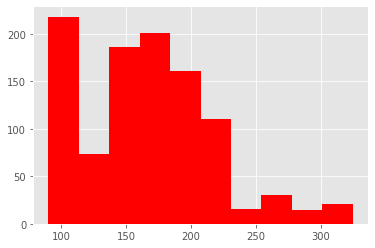

In [8]:
#check the skewness of Close
print ("The skewness of Close on training data is:", data['Close'].skew())
plt.hist(data['Close'], color='red')
plt.show()

The skewness of the log of Close on the data is: -0.0630679607761273


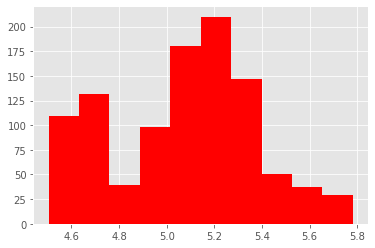

In [9]:
#taking log of Close to reduce the skewness
target = np.log(data['Close'])
print ("The skewness of the log of Close on the data is:", target.skew())
plt.hist(target, color='red')
plt.show()

In [10]:
#check for missing values
null_data = pd.DataFrame(data.isnull().sum().sort_values(ascending=False))[:50]

null_data.columns = ['Null Count']
null_data.index.name = 'Feature'
null_data

,Null Count
Feature,
Day,0
Month,0
Year,0
Adj Close,0
Volume,0
Close,0
Open,0
Low,0
High,0


In [11]:
#create a DF for log transformation of Close
data['logClose']=np.log(data['Close']+1)

data.head()
data.shape

(1031, 11)

In [12]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month,Day,logClose
0,2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.446655,2016,1,4,4.666736
1,2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.979675,2016,1,5,4.641599
2,2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,94.101387,2016,1,6,4.622027
3,2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,90.129868,2016,1,7,4.579339
4,2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.606438,2016,1,8,4.584559


In [13]:
x = data.drop(columns = ['Date', 'logClose', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'])
y = data['logClose']

display(x.head())
display(y.head())

,Year,Month,Day
0,2016,1,4
1,2016,1,5
2,2016,1,6
3,2016,1,7
4,2016,1,8


0    4.666736
1    4.641599
2    4.622027
3    4.579339
4    4.584559
Name: logClose, dtype: float64

In [14]:
#split the given train dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.35, shuffle=False)
x_train.head()

,Year,Month,Day
0,2016,1,4
1,2016,1,5
2,2016,1,6
3,2016,1,7
4,2016,1,8


In [15]:
#import needed libraries
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

#create a function to calculate the mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def printScore(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
    
    print('Evaluation Metrics')
    print('MAE         : %0.4f ' % mae)
    print('MAPE        : %0.4f ' % mape)
    print('RMSLE       : %0.4f ' % rmsle)   

In [16]:
#Linear Regression

lr = LinearRegression(n_jobs = -1)

lr.fit(x_train, y_train)

y_pred = lr.predict(x_train)

print('-------Linear Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = lr.predict(x_test)

print('')
print('-------Linear Regression(on Test Set)------')
printScore(y_test, y_pred)

-------Linear Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0475 
MAPE        : 0.9702 
RMSLE       : 0.0097 

-------Linear Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.2135 
MAPE        : 4.0566 
RMSLE       : 0.0384 


In [17]:
#LR_Lasso
model_lasso = Lasso(random_state=42,alpha=0.00035)
lr_lasso = make_pipeline(RobustScaler(), model_lasso)
lr_lasso.fit(x_train,y_train)



y_pred = lr_lasso.predict(x_train)

print('-------LR_lasso Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = lr_lasso.predict(x_test)

print('')
print('-------LR_lasso Regression(on Test Set)------')
printScore(y_test, y_pred)

-------LR_lasso Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0474 
MAPE        : 0.9698 
RMSLE       : 0.0097 

-------LR_lasso Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.2122 
MAPE        : 4.0319 
RMSLE       : 0.0382 


In [18]:
#LGBM Regression
lgb = lgb.LGBMRegressor()
lgb.fit(x_train, y_train)

y_pred = lgb.predict(x_train)

print('-------LGBM Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = lgb.predict(x_test)

print('')
print('-------LGBM Regression(on Test Set)------')
printScore(y_test, y_pred)

-------LGBM Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0107 
MAPE        : 0.2179 
RMSLE       : 0.0025 

-------LGBM Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.1366 
MAPE        : 2.5021 
RMSLE       : 0.0317 


In [19]:
#RandomForest Regression
forest_reg = RandomForestRegressor(n_estimators=1, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
forest_reg.fit(x_train, y_train)

y_pred = forest_reg.predict(x_train)

print('-------RandomForest Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = forest_reg.predict(x_test)

print('')
print('-------RandomForest Regression(on Test Set)------')
printScore(y_test, y_pred)

-------RandomForest Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0119 
MAPE        : 0.2400 
RMSLE       : 0.0094 

-------RandomForest Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.2260 
MAPE        : 4.1262 
RMSLE       : 0.0468 


In [20]:
#GBoost Regression
model_GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.0156,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =42)

model_GBoost.fit(x_train, y_train)

y_pred = model_GBoost.predict(x_train)

print('-------GradientBoosting Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = model_GBoost.predict(x_test)

print('')
print('------- GradientBoosting Regression(on Test Set)------')
printScore(y_test, y_pred)

-------GradientBoosting Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0102 
MAPE        : 0.2073 
RMSLE       : 0.0025 

------- GradientBoosting Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.1479 
MAPE        : 2.7071 
RMSLE       : 0.0326 


In [21]:
#XGBoost Regression
XGB_regr = xgb.XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

XGB_regr.fit(x_train, y_train)

y_pred = XGB_regr.predict(x_train)

print('-------XGB Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = XGB_regr.predict(x_test)

print('')
print('------- XGB Regression(on Test Set)------')
printScore(y_test, y_pred)

[15:36:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-------XGB Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0144 
MAPE        : 0.2940 
RMSLE       : 0.0032 

------- XGB Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.1415 
MAPE        : 2.5963 
RMSLE       : 0.0319 


In [25]:
#making stock price prediction for the future
import datetime
#a function to get user's input for the date for the stock price prediction
def ObtainDate():
    isValid=False
    while not isValid:
        userIn = input("Enter the target date for the stock price prediction (dd/mm/yyyy)(for example: 01/02/2025) ")
        try: # strptime throws an exception if the input doesn't match the pattern
            d = datetime.datetime.strptime(userIn, "%d/%m/%Y")
            isValid=True
        except:
            print ("Doh, try again!\n")
    return d

a = ObtainDate()

targetDate = pd.DataFrame({'Year': [a.year], 'Month': [a.month], 'Day': [a.day]})

def futurePrice(model, td):
    futurePrice = np.exp(model.predict(td))-1
    return futurePrice

#using the best models to predict

print ('Using model of LR, the future stock price is:', futurePrice(lr, targetDate))
print ('Using model of LR_Lasso, the future stock price is:', futurePrice(lr_lasso, targetDate))
print ('Using model of XBG, the future stock price is:', futurePrice(XGB_regr , targetDate))
print ('Using model of RFR, the future stock price is:', futurePrice(forest_reg , targetDate))
print ('Using model of LGBM, the future stock price is:', futurePrice(lgb, targetDate))
print ('Using model of GB, the future stock price is:', futurePrice(model_GBoost, targetDate))


Enter the target date for the stock price prediction (dd/mm/yyyy)(for example: 01/02/2025) 06/02/2025
Using model of LR, the future stock price is: [832.52546604]
Using model of LR_Lasso, the future stock price is: [830.30433687]
Using model of XBG, the future stock price is: [164.17587]
Using model of RFR, the future stock price is: [163.02999878]
Using model of LGBM, the future stock price is: [162.24183606]
Using model of GB, the future stock price is: [162.80741762]


## Since stock prices tends to increase over time, it suggests, LR and LR_lasso are the final best models to predict the stock prices.



In [26]:
#future returns on investment in the chosen stock from today's purchase

def whole_data_training (model, x, y):
        model.fit(x,y)

whole_data_training(lr, x, y)
whole_data_training(lr_lasso, x, y)

#livePrice = si.get_live_price("aapl")
livePrice = float(input("Enter the current price of the stock:) "))

returns = ((futurePrice(lr, targetDate)+futurePrice(lr_lasso , targetDate))/2 - livePrice)/livePrice

print ('If invested today, the future returns on the chosen stock to the target date is: ', "%.2f" %  (float(returns)*100), '%!')

Enter the current price of the stock:) 324
If invested today, the future returns on the chosen stock to the target date is:  156.61 %!
